# Capstone Project Part 1: World Progress

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

### Logistics

**Deadline.** Parts 1 and 2 of the Capstone project are due at 11:59pm on Monday, 17 December 2018. Late submissions will not be accepted. This notebook forms Part 1. A note on Part 2 is at the end of this notebook.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers.

**Support.** You are not alone! The Slack workspace at https://ox-p4ds.slack.com will be stay active up until after the assignment deadline. Please feel free to ask each other questions and discuss approaches, even if you're not in the same physical classroom. The tutor will be available to answer general questions too, so please **do not hesitate** to ask questions even after the last week of term. 

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

To get started, load `pandas`, `numpy`, and `matplotlib`.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
from datascience import Table

## 1. Global Population Growth


The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="images/pew_population_projection.png"/> 
</a>

In this section, we will examine some of the factors that influence population growth and how they are changing around the world.

The first table we will consider is the total population of each country over time. Run the cell below.

In [2]:
# The population.csv file can also be found online here:
# https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/ddf--datapoints--population_total--by--geo--time.csv
# The version in this project was downloaded in February, 2017.
population = pd.read_csv('population.csv')
population.head(3)

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286


In [3]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87795 entries, 0 to 87794
Data columns (total 3 columns):
geo                 87795 non-null object
time                87795 non-null int64
population_total    87795 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.0+ MB


### Bangladesh

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Inspect the standard to find the 3-letter code for Bangladesh.

**Question 1.** Create a `DataFrame` called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2015 (including both 1970 and 2015) and the second should contain the population of Bangladesh in each of those years.

In [18]:
b_pop = population[(population.geo == 'bgd') & (population.time.between(1970, 2015, inclusive=True))].drop(['geo'], axis=1)
b_pop

,time,population_total
7509,1970,65048701
7510,1971,66417450
7511,1972,67578486
7512,1973,68658472
7513,1974,69837960
7514,1975,71247153
7515,1976,72930206
7516,1977,74848466
7517,1978,76948378
7518,1979,79141947


Create a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [19]:
fives = np.arange(1970, 2016, 5) # 1970, 1975, 1980, ...
b_five = ...
b_five

Ellipsis

In [20]:
fives = np.arange(1970, 2016, 5) # 1970, 1975, 1980, ...
b_five = b_pop[b_pop.time.isin(fives)]
b_five

,time,population_total
7509,1970,65048701
7514,1975,71247153
7519,1980,81364176
7524,1985,93015182
7529,1990,105983136
7534,1995,118427768
7539,2000,131280739
7544,2005,142929979
7549,2010,151616777
7554,2015,160995642


**Question 2.** Create a table called `b_five_growth` that includes three columns, `time`, `population_total`, and `annual_growth`. There should be one row for every five years from 1970 through 2010 (but not 2015). The first two columns are the same as `b_five`. The third column is the **annual** growth rate for each five-year period. For example, the annual growth rate for 1975 is the yearly exponential growth rate that describes the total growth from 1975 to 1980 when applied 5 times.

*Hint*: Only your `b_five_growth` table will be scored for correctness; the other names are suggestions that you are welcome to use, change, or delete.

In [21]:
b_1970_through_2010 = b_five[b_five.time.between(1970, 2010, inclusive=True)]
initial = b_1970_through_2010.population_total
changed = np.diff(b_five.population_total)
rate = pd.DataFrame()
rate['annual_growth'] = changed / initial * 100 / 5
b_five_growth = pd.concat([b_1970_through_2010,rate], axis = 1)
b_five_growth

,time,population_total,annual_growth
7509,1970,65048701,1.905788
7514,1975,71247153,2.839980
7519,1980,81364176,2.863915
7524,1985,93015182,2.788352
7529,1990,105983136,2.348417
7534,1995,118427768,2.170601
7539,2000,131280739,1.774707
7544,2005,142929979,1.215532
7549,2010,151616777,1.237180


While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2005. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [22]:
life_expectancy = pd.read_csv('life_expectancy.csv')
child_mortality = pd.read_csv('child_mortality.csv')
fertility = pd.read_csv('fertility.csv')

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.

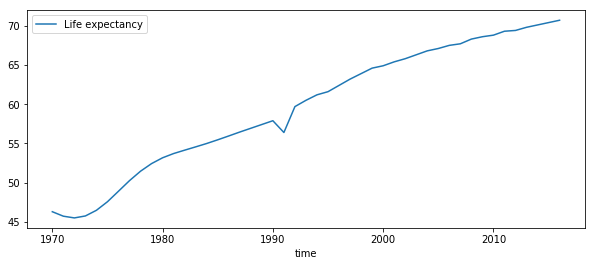

In [23]:
t_exp = life_expectancy[(life_expectancy['time'] >= 1970) & (life_expectancy['geo'] == 'bgd')]
t_exp = pd.Series(data=t_exp['life_expectancy_years'].values, index=t_exp['time'])
t_exp.plot(figsize=(10,4), label="Life expectancy", legend=True)

**Question 4.** Does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not? What happened in Bangladesh in 1991, and does that event explain the change in population growth rate?

_The life expectancy increased constently (except for a couple of years in the 1990s) since the early 1970s and thus cannot explain the drop in population growth rate observed after the 1980s. The drop has to be explained by one or multiple other parameters : increase in child mortality or decrease in fertility._

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

**Question 5.** Write a function `fertility_over_time` that takes the Alpha-3 code of a `country` and a `start` year. It returns a two-column table with labels "`Year`" and "`Children per woman`" that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, in the next cell, call your `fertility_over_time` function on the Alpha-3 code for Bangladesh and the year 1970 in order to plot how Bangladesh's fertility rate has changed since 1970. **The expression that draws the line plot is provided for you; please don't change it.**

In [24]:
def fertility_over_time(country, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    child_pw = fertility[(fertility.geo == country) & (fertility.time >= start)].drop(columns = ['geo'])
    child_pw.columns = ['Year', 'Children per woman']
    return child_pw

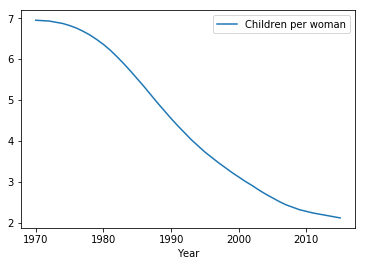

In [25]:
bangladesh_code = 'bgd'
fertility_over_time(bangladesh_code, 1970).plot(0, 1) # You should *not* change this line.

**Question 6.** Does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not?

_The decrease in child per woman seems to be directly correlated to the reduce in population growth. The decrease startd and finished at the same year as the decrease in growth_

It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 7.** Using both the `fertility` and `child_mortality` tables, draw a scatter diagram with one point for each year, starting with 1970, that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis. 

**The expression that draws the scatter diagram is provided for you; please don't change it.** Instead, create a table called `fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. Use the label "`Children per woman`" to describe total fertility and the label "`Child deaths per 1000 born`" to describe child mortality.

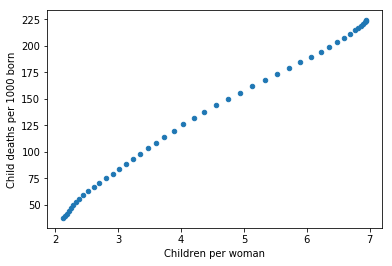

In [26]:
fertility_and_child_mortality = a = fertility_over_time('bgd', 1970)
a['Child deaths per 1000 born'] = child_mortality['child_mortality_0_5_year_olds_dying_per_1000_born'][(child_mortality.geo == 'bgd') & (child_mortality.time >= 1970)].values
fertility_and_child_mortality.plot.scatter('Children per woman', 'Child deaths per 1000 born') # You should *not* change this line.

**Question 8.** In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality causes parents to choose to have fewer children?

_A direct correlation is observed between child death and children per woman. Hence, fewer child death is observed in families with fewer born babies_

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1960 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

In [27]:
# the follow block is not working

In [28]:
pd.DataFrame({
    '1960': fertility.where('time', 1960).column(2),
    '2010': fertility.where('time', 2010).column(2)
    }
).hist(bins=np.arange(0, 10, 0.5), unit='child')
_ = plots.xlabel('Children per woman')
_ = plots.xticks(np.arange(10))

ValueError: Array conditional must be same shape as self

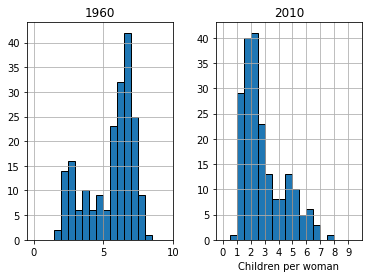

In [29]:
pd.DataFrame({
    '1960': fertility.where(fertility.time == 1960).children_per_woman_total_fertility,
    '2010': fertility.where(fertility.time == 2010).children_per_woman_total_fertility
    }
).hist(bins=np.arange(0, 10, 0.5))
_ = plots.xlabel('Children per woman')
_ = plots.xticks(np.arange(10))


**Question 9.** Assign `fertility_statements` to a list of the numbers for each statement below that can be correctly inferred from these histograms.
1. About the same number of countries had a fertility rate between 3.5 and 4.5 in both 1960 and 2010.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2.
1. In 1960, less than 20% of countries had a fertility rate below 3.
1. More countries had a fertility rate above 3 in 1960 than in 2010.
1. At least half of countries had a fertility rate between 5 and 8 in 1960.
1. At least half of countries had a fertility rate below 3 in 2010.

In [30]:
fertility_statements = [1, 2, 3, 4, 5, 6]

**Question 10.** Draw a line plot of the world population from 1800 through 2005. The world population is the sum of all the country's populations. 

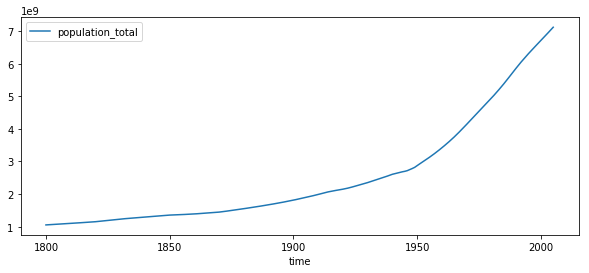

In [31]:
pop = population[population.time.between(1800, 2005, inclusive=True)].groupby('time').sum()
pop.plot(figsize=(10,4), label="Total world population", legend=True)

**Question 11.** Create a function `stats_for_year` that takes a `year` and returns a table of statistics. The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`. Each row should contain one Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. Only include rows for which all three statistics are available for the country and year.

In addition, restrict the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2010. This restriction will speed up computations later in the project.

In [32]:
# We first create a population table that only includes the 
# 50 countries with the largest 2010 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population[population.time == 2010].sort_values(by=['population_total'], ascending = False).head(50)['geo']
population_of_big_50 = population[population.geo.isin(big_50)]
fertility_of_big_50 = fertility[fertility.geo.isin(big_50)]
child_mortality_of_big_50 = child_mortality[child_mortality.geo.isin(big_50)]

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50[population_of_big_50.time == year].drop(columns = ['time']) # population_of_big_50.where('time', year).drop('time')
    f = fertility_of_big_50[fertility_of_big_50.time == year].drop(columns = ['time']) # fertility.where('time', year).drop('time')
    c = child_mortality_of_big_50[child_mortality_of_big_50.time == year].drop(columns = ['time']) # child_mortality.where('time', year).drop('time')
    return (pd.merge(p,f, on='geo').merge(c, on='geo').dropna())
    

In [33]:
decades

NameError: name 'decades' is not defined

In [34]:
decades

NameError: name 'decades' is not defined

**Question 12.** Create a table called `pop_by_decade` with two columns called `decade` and `population`. It has a row for each `year` since 1960 that starts a decade. The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. For example, 1960 is the first year of the 1960's decade. You should see that these countries contain most of the world's population.

*Hint:* One approach is to define a function `pop_for_year` that computes this total population, then `apply` it to the `decade` column. 

In [35]:
decades = pd.DataFrame({
    'decade': np.arange(1960, 2011, 10)
    }
)

def pop_for_year(year):
    d_pop = stats_for_year(year).sum()['population_total']
    return d_pop

decades['population'] = decades['decade'].apply(pop_for_year)
pop_by_decade = decades
pop_by_decade

,decade,population
0,1960,2624944597
1,1970,3211487418
2,1980,3880722003
3,1990,4648434558
4,2000,5367553063
5,2010,6040810517


The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [36]:
# this block below is not going to work

In [37]:
countries = pd.read_csv('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
countries.select('country', 'name', 'world_6region')

NameError: name 'are' is not defined

In [38]:
countries = pd.read_csv('countries.csv')
countries = countries[['country', 'name', 'world_6region']]
countries = countries[countries.country.isin(population.geo)]
countries

,country,name,world_6region
1,afg,Afghanistan,south_asia
2,akr_a_dhe,Akrotiri and Dhekelia,europe_central_asia
3,alb,Albania,europe_central_asia
4,dza,Algeria,middle_east_north_africa
5,asm,American Samoa,east_asia_pacific
6,and,Andorra,europe_central_asia
7,ago,Angola,sub_saharan_africa
8,aia,Anguilla,america
10,atg,Antigua and Barbuda,america
11,arg,Argentina,america


**Question 13.** Create a table called `region_counts` that has two columns, `region` and `count`. It should describe the count of how many countries in each region appear in the result of `stats_for_year(1960)`. For example, one row would have `south_asia` as its `world_6region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 1960.

In [39]:
region_counts = stats_for_year(1960).merge(countries, how='inner', left_on='geo', right_on='country').groupby('world_6region').count()
region_counts = region_counts[['geo']].rename(columns = {'geo': 'count'})
region_counts = region_counts.reset_index()
region_counts

,world_6region,count
0,america,8
1,east_asia_pacific,10
2,europe_central_asia,10
3,middle_east_north_africa,7
4,south_asia,5
5,sub_saharan_africa,10


The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. Run the cell. Do you think you can identify any of the dots?

In [40]:
###
### the code for this cell is depreciated
###

from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.



@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabeled(2, 'Children per woman').relabeled(3, 'Child deaths per 1000 born')

def fertilty_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, colors=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)

fertilty_vs_child_mortality(1960)

AttributeError: 'DataFrame' object has no attribute 'relabeled'

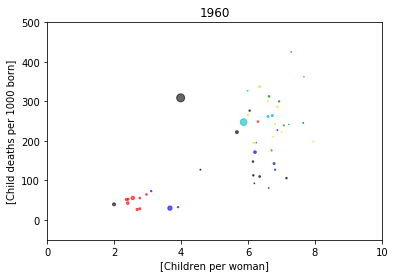

In [41]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).rename(columns={stats_for_year(year).columns[2]: 'Children per woman', stats_for_year(year).columns[3]: 'Child deaths per 1000 born'})

def fertilty_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    cmap = {'america' : 'b', 'east_asia_pacific' : 'k', 'europe_central_asia' : 'r', 'middle_east_north_africa' : 'g', 'south_asia' : 'c', 'sub_saharan_africa' : 'gold'}
    with_region = stats_relabeled(year).merge(countries[['country', 'world_6region']], left_on='geo', right_on='country').drop(columns=['geo'])
    size_country = with_region['population_total'] / 1e7
    with_region.plot.scatter(x = ['Children per woman'], 
                             y = ['Child deaths per 1000 born'], 
                             s = size_country,
                             color = [cmap.get(r, 'black') for r in with_region.world_6region],
                             #cmap='viridis', 
                             alpha=0.6)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)

fertilty_vs_child_mortality(1960)

**Question 14.** Assign `scatter_statements` to a list of the numbers for each statement below that can be inferred from this scatter diagram for 1960. 
1. The `europe_central_asia` region had the lowest child mortality rate.
1. The lowest child mortality rate of any country was from an `east_asian_pacific` country.
1. Most countries had a fertility rate above 5.
1. There was an association between child mortality and fertility.
1. The two largest countries by population also had the two highest child mortality rate.

In [42]:
scatter_statements = [1, 3, 4]

The result of the cell below is interactive. Drag the slider to the right to see how countries have changed over time. You'll find that the great divide between so-called "Western" and "developing" countries that existed in the 1960's has nearly disappeared. This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries.

In [43]:
import ipywidgets as widgets

# This part takes a few minutes to run because it 
# computes 55 tables in advance: one for each year.
#pd.DataFrame(
#    {
#        'Year': np.arange(1960, 2016)
#    }
#).apply(stats_relabeled)

_ = widgets.interact(fertilty_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2015, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2015, min=1960), Output()), _dom_classes=(…

Now is a great time to take a break and watch the same data presented by [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) with smoother animation and witty commentary.

## 2. Global Poverty


In 1800, 85% of the world's 1 billion people lived in *extreme poverty*, defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." A common measure of extreme poverty is a person living on less than \$1.25 per day.

In 2015, the proportion of people living in extreme poverty was estimated to be 12%. Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still close to 1 billion. The United Nations recently adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere."
In this section, we will examine extreme poverty trends around the world.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [ ]:
# This code is not working

In [ ]:
population = pd.read_csv('population.csv')
countries =  pd.read_csv('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
poverty =  pd.read_csv('poverty.csv')
poverty.show(3)

In [ ]:
population = pd.read_csv('population.csv')
countries = pd.read_csv('countries.csv')
countries = countries[['country', 'name', 'world_6region']]
countries = countries[countries.country.isin(population.geo)]
poverty =  pd.read_csv('poverty.csv')
poverty.head(3)

**Question 1.** Assign `latest` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the *most recent year* for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year. **Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: the `first` function may be helpful, but you are not required to use it.

In [ ]:
#def first(values):
#    return values.item(0)
latest = pd.DataFrame()
for x in population.geo.unique():
    latest = latest.append(poverty[poverty['geo'] == x].sort_values(by = ['time'], ascending = False).head(1))

latest = latest.rename(columns={"extreme_poverty_percent_people_below_125_a_day":"poverty_percent"}) # You should *not* change this line.
latest

**Question 2.** Using both `latest` and `population`, create a four-column table called `recent` with one row for each country in `latest`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

In [ ]:
pov = pd.DataFrame()
pov[['geo','poverty_percent']] = latest[['geo','poverty_percent']]
recent = pd.merge(pov, population[population.time == 2010], on='geo').drop(columns = ['time'])

pov_total = round(recent.poverty_percent / 100 * recent.population_total).astype('int64')
recent['poverty_total'] = pov_total
recent

**Question 3.** Assuming that the `poverty_total` numbers in the `recent` table describe *all* people in 2010 living in extreme poverty, assign the name `poverty_percent` to the percentage of the world's 2010 population that were living in extreme poverty. You should find a number that is somewhat above the 2015 global estimate of 12%, since many country-specific poverty rates are older than 2015.

*Hint*: The sum of the `population_total` column in the `recent` table is not the world population, because only a subset of the world's countries have known poverty rates. Use the `population` table to compute the world's 2010 total population.

In [ ]:
poverty_percent = recent.poverty_total.sum() / population.population_total[population['time'] == 2010].sum()
poverty_percent

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [ ]:
#The next block is not working

In [ ]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

In [ ]:
countries = pd.read_csv('countries.csv')
countries = countries [['country', 'name', 'world_4region', 'latitude', 'longitude']]
countries

**Question 4.** Using both `countries` and `recent`, create a five-column table called `poverty_map` with one row for every country in `recent`.  The four columns should have the following labels and contents:
1. `latitude` contains the country's latitude,
1. `longitude` contains the country's longitude,
1. `name` contains the country's name,
1. `region` contains the country's region from the `world_4region` column of `countries`,
1. `poverty_total` contains the country's poverty total.

In [ ]:
poverty_map = pd.merge(recent,countries, left_on='geo', right_on='country').drop(columns = ['geo', 'country', 'poverty_percent', 'population_total'])
poverty_map = poverty_map.rename(columns = {'world_4region' : 'region'})
poverty_map

Run the cell below to draw a map of the world in which the areas of circles represent the number of people living in extreme poverty. Double-click on the map to zoom in.

In [ ]:
# This block is not working

In [ ]:
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_column(
    'poverty_total', 2e4 * poverty_map.column('poverty_total'),
    'region', poverty_map.apply(colors.get, 'region')
)
Circle.map_table(scaled)

Although people live in extreme poverty throughout the world (with more than 5 million in the United States), the largest numbers are in Asia and Africa.

**Question 5.** Assign `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.

In [ ]:
largest = recent.sort_values(by = 'poverty_total', ascending = False).head(10).drop(columns = ['poverty_percent', 'population_total'])
largest

**Question 6.** Write a function called `poverty_timeline` that takes the name of a country as its argument. It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

*Hint*: The names within the `poverty_timeline` function correspond to our staff solution, but you don't need to use them. Any way that you want to draw the plot is fine, as long as it generates the correct graph.

In [ ]:
#def population_for_country_in_year(row_of_poverty_table):
#    """Optional: Define a function to return the population 
#    of a country in a year using a row from the poverty table."""
#    geo = poverty.geo[0]
#    year = poverty.time[0]
#    pop_y = population[(population['geo'] == geo) & (population['time'] == year)].population_total.values[0]
#    return pop_y
    

def poverty_timeline(country):
    """Draw a timeline of people living in extreme poverty in a country."""
    geo = countries[countries['name'] == country].country.values[0]
    country_poverty = poverty[poverty['geo'] == geo]
    #country_pop = country_poverty.apply(row_of_poverty_table)
    country_pop = pd.merge(country_poverty, population, left_on=['time', 'geo'], right_on=['time', 'geo'])
    country_pop['poverty_total'] = country_pop.extreme_poverty_percent_people_below_125_a_day * country_pop.population_total
    return country_pop.plot(1,4)

In [ ]:
poverty_timeline('India')

Finally, draw the timelines below to see how the world is changing. You can check your work by comparing your graphs to the ones on [gapminder.org](https://goo.gl/lPujuh).

In [ ]:
poverty_timeline('India')

In [ ]:
poverty_timeline('Nigeria')

In [ ]:
poverty_timeline('China')

In [ ]:
poverty_timeline('United States')

Although the number of people living in extreme poverty has been increasing in Nigeria and the United States, the massive decreases in China and India have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

Below, we've also added an interactive dropdown menu for you to visualize `poverty_timeline` graphs for other countries. Note that each dropdown menu selection may take a few seconds to run.

In [1]:
# Just run this cell
from ipywidgets import interact, interactive, fixed, interact_manual
all_countries = poverty_map.name.values
_ = interact(poverty_timeline, country=list(all_countries))

NameError: name 'poverty_map' is not defined

**You're finished!** Congratulations on mastering data visualization and table manipulation. Time to submit.

# Capstone Project Part 2: Open Challenge

For part 2 of your Capstone Project assignment, I want you to submit your own Jupyter Notebook written from scratch. I also want you to select your own data source **and** *your own questions* to ask about the data you have selected.

This sounds difficult -- and it is. But the point here is to give you the experience in exploring data yourself and understanding that a big part of data science is in asking questions and exploring on your own. Who knows, you might find something interesting and valuable enough that this time next year you could be CEO of your own multimillion pound start-up!

Think back to exercise 8 (London 2012 Olympics data) and the kinds of questions I set for you in that challenge. This time however, I want you to demonstrate as much of what you have learned in this course as possible. In particular, I want you to create a Jupyter Notebook that demonstrates the following:
 - Gathering data from a data source. You could do this programmatically (e.g. with a Python library querying an API such as `tweepy`), or just downloaded from somewhere. If the latter, please add some text describing where you got the data from and why you thought it might be interesting.
 - Data formatting and cleaning. If your data is semi-structured and not already in a CSV, it would be great to see how you mapped it across using some string formatting. Also examples of data cleaning -- removing spurious values or dealing with missing values.
 - Using `DataFrame`s - intermediate ones, processed ones, etc. By now you should know that the `DataFrame` is an essential tool!
 - Visualizations. We already know we can visualize directly from `DataFrame`s but it would also be great to see if you could utilize `bokeh` to create other charts.
 - Classification using `scikit-learn` or Natural Language Processing using `nltk`. After the Machine Learning lecture, if you want to try out some classification or NLP, that would be great to see.
 
If you're not too sure how to get started with this bit, please ask the class tutor for help as early as possible.
 
Please submit Part 2 as a *separate* notebook.